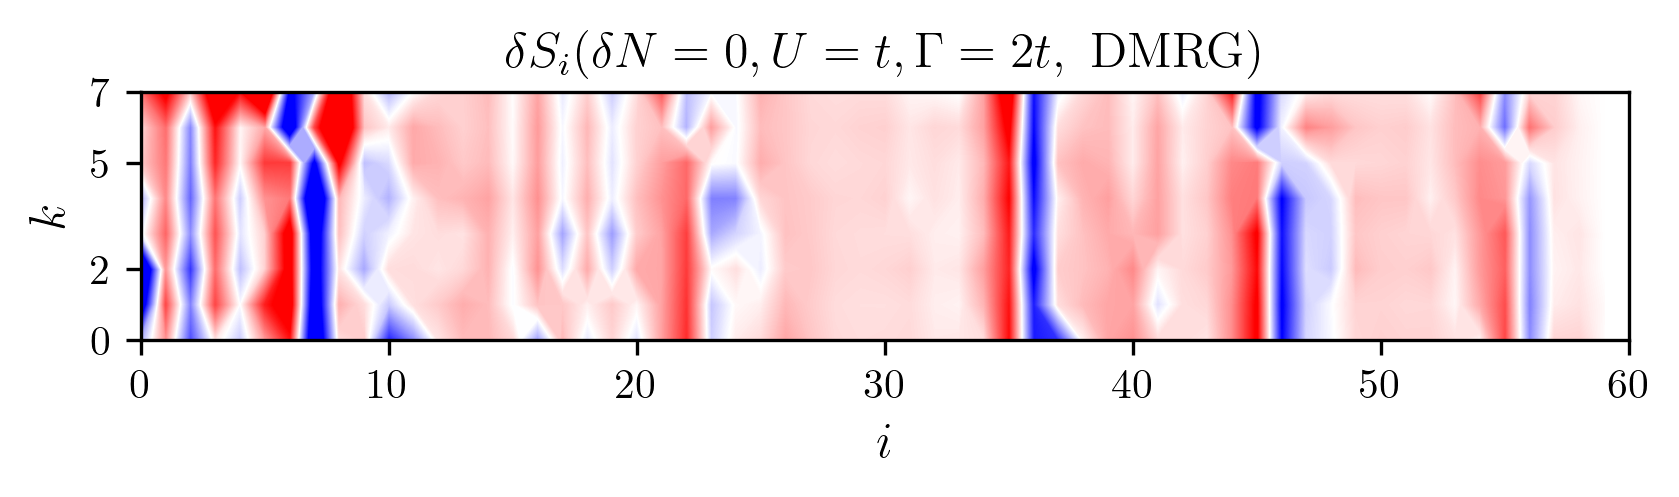

In [7]:
from model_setup import *

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable


def color_bar(rowdata):
    colors = []
    for i in range(len(rowdata)):
        if rowdata[i] > 0:
            colors.append("r")
        else:
            colors.append("b")
    return colors

def sortdata(Lx, Ly, filename):
    quantity = filename
    line = [ [] for _ in range(Ly) ]
    for i in range(len(quantity)):
        for j in range(Ly):
            if np.mod(i, Ly) == j:
                line[j].append(quantity[i])
    
    the_list = []
    for i in range(Ly):
        the_list.append(line[i])
    return the_list

fig, ax = plt.subplots(dpi=300, nrows=1, sharex=True)
plt.rcParams.update({'text.usetex': True})


M = ribbon8_clean('dummy')

Lx = 60
Ly = 8
total_sites = M.lat.N_sites


ent_load = np.loadtxt('./data/60_8_disorder_ee_xsweeps_test.txt') -  np.loadtxt('./data/60_8_clean_ee_xsweeps_test.txt')
ent_del = sortdata(Lx, Ly, np.insert(ent_load, total_sites-1, [0, 0, 0, 0, 0]))


    
ax.contourf(np.arange(Lx), np.arange(Ly), ent_del, cmap=cm.bwr, vmax=0.2, vmin=-0.2, levels=1000)
ax.set_yticks([0,2,5,7])
ax.set_xticks(np.arange(0, Lx+1, 10))
ax.set_aspect(10*1/7)
ax.set_ylabel(r'$k$', fontsize=12)
ax.set_xlabel(r'$i$', fontsize=12)


    
ax.set_title(r'$\delta S_i (\delta N = 0, U = t, \Gamma = 2t, \textnormal{ DMRG})$')
    
# plt.show()
plt.savefig("dmrg_transfer_gamma2.png", bbox_inches='tight')